# Geoapify Places Demo

In [15]:
!pip install Pillow

In [18]:
# Dependencies
import requests
import json
from PIL import Image
import matplotlib.pyplot as plt

# Import the API key
geoapify_key = '03bbd1deb76644a2b0a55c3e2626ab9c'

In [19]:
# Set the geographical coordinates for Sydney, Australia
latitude = -33.8698439
longitude = 151.2082848

# Set the parameters for the type of place
categories = "catering.restaurant"
conditions = "vegetarian"
radius = 8000

# Set the parameters for the type of search
filters = f"circle:{longitude},{latitude},{radius}"
bias = f"proximity:{longitude},{latitude}"
limit = 20

# set up a parameters dictionary
params = {
    "categories":categories,
    "conditions":conditions,
    "limit":limit,
    "filter":filters,
    "bias":bias,
    "apiKey":geoapify_key    
}

# Set base URL
base_url = "https://api.geoapify.com/v2/places"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
places_data = response.json()

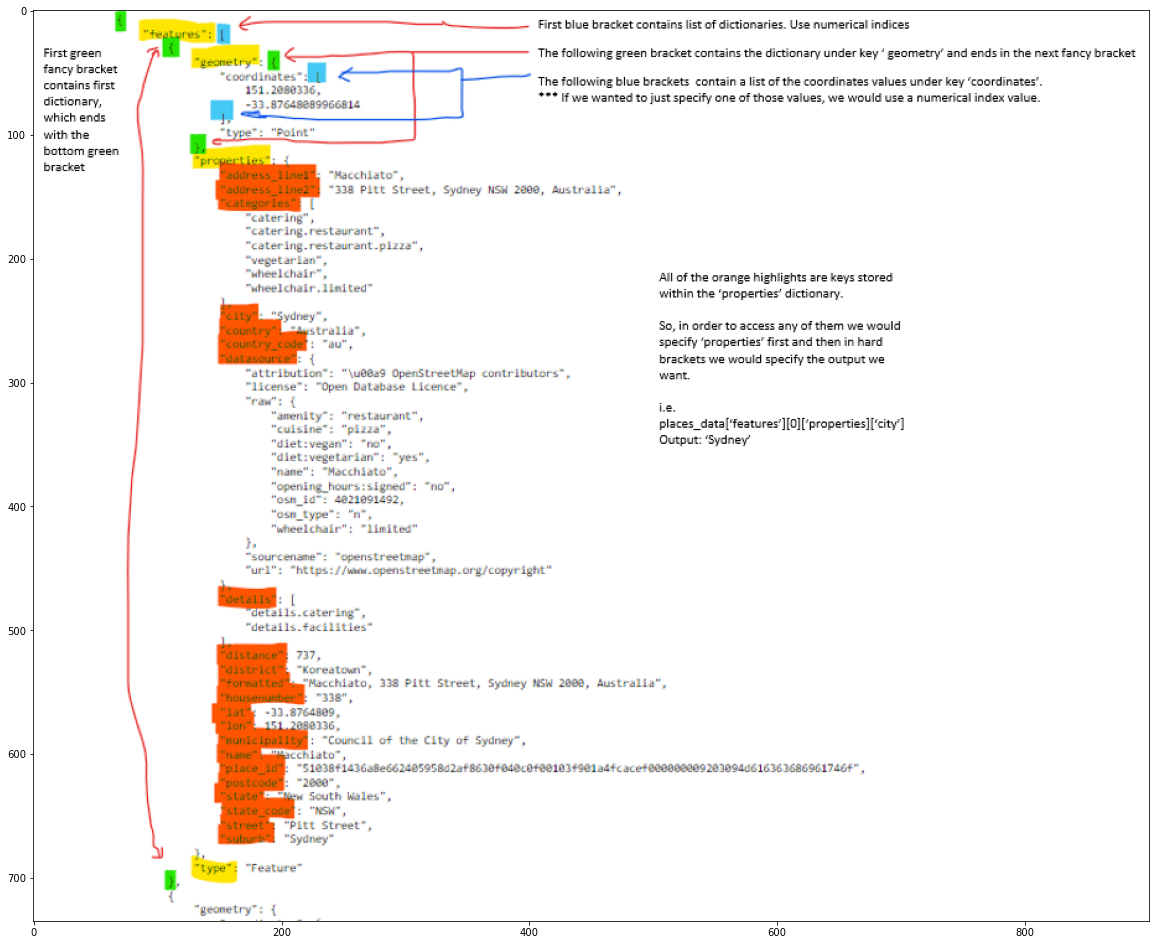

In [27]:
img = Image.open('images/jsonbreakdown.png')
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()

In [28]:
print("For this notesheet we are searching for Vegetarian Restaurants within an 8000m range of the center of Sydney, Australia")
print("** 'places_data' is the variable we created to save the response from our API which is class 'dict'.")
print("----------------------------------------------------------------------------------")
print(f"If we print the length of places_data we get the output: {len(places_data)}.")
print(f"If we print the type of places_data we confirm it is a {type(places_data)}.")
print(f"This means there are {len(places_data)} keys in the dictionary 'places_data': {places_data.keys()}")
print("We will use 'places_data[features]' to specify the key we want to pull from in the opening dictionary.")
print("----------------------------------------------------------------------------------")
print("Specifying the key 'features' pulls a list of dictionaries from the API.")
print(f"There are {len(places_data['features'])} place values within this list of dictionaries.")
print(f"The command 'type(places_data['features'])' confirms we are working in a {type(places_data['features'])}")
print("Because it is a list, we need to specify a numerical list index in order to pull the dictionary from the FeatureCollection.")
print("----------------------------------------------------------------------------------")
print("We will specify 'places_data['features'][0]' to get the most relevant search data from the API.")
print("In other words, the first output in our list of dictionaries under 'feature' is the most closely related to our query.")
print("Likewise, If we specified 'places_data[features][2]' we could get the third closest response from the API.")
print(f"Within index [0] is a dictionary with {len(places_data['features'][0])} keys: {places_data['features'][0].keys()}")
print("This is when it might be useful to pretty print our data once again to specify the extact data you're collecting.")
print("----------------------------------------------------------------------------------")
print(json.dumps(places_data['features'][0], indent=4, sort_keys=True))
print("----------------------------------------------------------------------------------")
print("Here, we see the coordinates for the nearest vegan restaurant are under the 'geometry' dict.")
print("If we want to save the coordinates under a variable we could make the command ... ")
print("coords_var = places_data['features'][0]['geometry']['coordinates']")
coords_var = places_data['features'][0]['geometry']['coordinates']
print(f"Output: {coords_var}")
print("----------------------------------------------------------------------------------")
print("Using the same logic we can pull information about the restaurant by specifying the 'properties' dict.")
print("** Specifying the 'type' dictionary is only going to have one value confirming this dict is a Feature")
print("----------------------------------------------------------------------------------")
print("So, specifying 'places_data['features'][0]['properties']['categories']' is going to: ")
print("1. Enter the 'features' key in our dictionary 'places_data'.")
print("2. Enter the first value in the list contained in the key 'features' from place_data dict.")
print("3. Enter the nested dictionary 'properties' within the list of dictionaries under 'features'.")
print("4. Pull the associated value(s) from the key 'categories' in our nested dictionary 'properties'.")
print("----------------------------------------------------------------------------------")
print(f"Output: {places_data['features'][0]['properties']['categories']}")
print("** The interpretation of these values is that all of these are categories that OpenStreetMap labeled the restaurant with.")

For this notesheet we are searching for Vegetarian Restaurants within an 8000m range of the center of Sydney, Australia
** 'places_data' is the variable we created to save the response from our API which is class 'dict'.
----------------------------------------------------------------------------------
If we print the length of places_data we get the output: 2.
If we print the type of places_data we confirm it is a <class 'dict'>.
This means there are 2 keys in the dictionary 'places_data': dict_keys(['type', 'features'])
We will use 'places_data[features]' to specify the key we want to pull from in the opening dictionary.
----------------------------------------------------------------------------------
Specifying the key 'features' pulls a list of dictionaries from the API.
There are 19 place values within this list of dictionaries.
The command 'type(places_data['features'])' confirms we are working in a <class 'list'>
Because it is a list, we need to specify a numerical list index i